In [1]:
#import packages
import pandas as pd
import numpy as np

#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

#read the file
df = pd.read_csv('stock_price_list',delimiter='\t')


In [2]:
def func_moving_average(stock):
    
    #setting index as date
    df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
    df.index = df['Date']
    #creating dataframe with date and the target variable
    data = df.sort_index(ascending=True, axis=0)
    new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

    for i in range(0,len(data)):
        new_data['Date'][i] = data['Date'][i]
        new_data['Close'][i] = data[stock][i]
    #splitting into train and validation
    train = new_data[:987]
    valid = new_data[987:]
    #make predictions
    preds = []
    for i in range(0,247):
        a = train['Close'][len(train)-247+i:].sum() + sum(preds)
        b = a/248
        preds.append(b)
    rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-preds),2)))
    #plot
    valid['Predictions'] = 0
    valid['Predictions'] = preds
    plt.plot(train['Close'])
    plt.plot(valid[['Close', 'Predictions']])
    return 'rms:',rms

/Users/wyc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/wyc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


('rms:', 41.61836365637539)

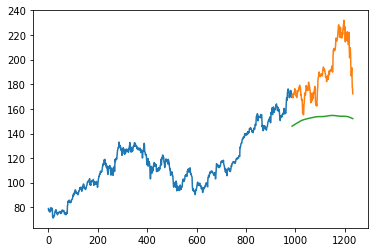

In [3]:
func_moving_average('AAPL')